# EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../data/players_and_transf.csv")
df = df.drop("Unnamed: 0",axis=1) # Delete index col

### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35685 entries, 0 to 35684
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            35685 non-null  object 
 1   club            35685 non-null  object 
 2   position        35685 non-null  object 
 3   apps            35685 non-null  object 
 4   mins            35685 non-null  int64  
 5   goals           35685 non-null  object 
 6   assists         35685 non-null  object 
 7   yel             35685 non-null  object 
 8   red             35685 non-null  object 
 9   shots           35685 non-null  object 
 10  ps%             35685 non-null  object 
 11  aerials_won     35685 non-null  object 
 12  motm            35685 non-null  object 
 13  rating          35685 non-null  float64
 14  tackles         35665 non-null  object 
 15  interceptions   35665 non-null  object 
 16  fouls           35665 non-null  object 
 17  offsides_won    35665 non-null 

In [4]:
df.describe(include="all")

,name,club,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,league,season,fee,traded
count,35685,35685,35685,35685,35685.000000,35685,35685,35685,35685,35685,35685,35685,35685,35685.000000,35665,35665,35665,35665,35665,35665,35665,35665,35665,35665,35665,35665,35665,35665,35655,35655,35655,35655,35685,35685,6501,35685.000000
unique,9802,180,30,674,NaN,45,22,19,6,66,691,92,22,NaN,62,61,44,30,129,41,27,5,43,59,52,28,51,53,886,37,154,14,5,13,465,NaN
top,Felipe,Genoa,FW,0(1),NaN,-,-,-,-,-,100,-,-,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,-,-,-,Serie A,2021/2022,free transfer,NaN
freq,25,430,8514,1802,NaN,18751,19165,9826,30967,6487,686,4607,23550,NaN,4838,5965,4706,23183,4626,5593,15108,33901,6948,7725,4153,20249,6708,7469,296,15440,3527,26883,7728,2916,1683,NaN
mean,NaN,NaN,NaN,NaN,1308.344094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.648062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182177
std,NaN,NaN,NaN,NaN,994.714175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385996
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1188.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,2140.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [5]:
df.head(10)

,name,club,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,league,season,fee,traded
0,Arjen Robben,Bayern,FW,18(6),1779,16,6,1,-,3.4,80.2,0.4,8,8.18,0.6,0.5,0.9,-,-,0.7,-,-,1.8,4,2.2,0.3,2.1,-,34.3,1.5,2,0.2,Bundesliga,2009/2010,NaN,0
1,Stefan Kieling,Leverkusen,FW,33,2924,21,5,3,-,3,72.4,2.1,6,7.79,1.2,0.7,2.5,-,0.3,0.5,0.1,-,1.6,1.1,3.1,1.8,2.2,-,32.5,0.2,0.4,0.1,Bundesliga,2009/2010,NaN,0
2,Zvjezdan Misimovic,Wolfsburg,FW,31,2768,10,13,7,-,2.4,77.5,0.2,8,7.74,1.9,0.6,1.5,-,0.2,1.2,0.1,-,3.3,1.5,2.1,0.3,3.1,-,51.1,2.5,5.7,0.5,Bundesliga,2009/2010,€8.50m,1
3,Edin Dzeko,Wolfsburg,FW,33(1),3003,22,7,4,-,4.5,70.7,0.7,6,7.73,0.5,0.1,1.9,-,0.9,0.2,0.1,-,1.1,2,1.7,1.6,2.9,-,19.5,0.2,1.1,0.1,Bundesliga,2009/2010,NaN,0
4,Claudio Pizarro,Werder Bremen,FW,23(3),2130,16,2,4,-,2.6,75.5,0.4,2,7.63,1,0.7,2,-,0.7,0.4,0.2,-,1.3,1.2,1.2,1.4,3.1,-,24.2,0.1,0.8,-,Bundesliga,2009/2010,NaN,0
5,Paolo Guerrero,Hamburg,FW,4(2),415,4,-,1,-,3,84.5,0.7,1,7.63,1.3,0.2,3.7,-,0.5,0.2,0.3,-,1.8,1.5,2.3,0.7,4.2,-,32.2,-,1.2,0.2,Bundesliga,2009/2010,NaN,0
6,Mesut Ozil,Werder Bremen,M(CLR),29(2),2601,9,13,2,-,2.2,82.5,0.1,6,7.62,0.7,0.8,0.7,-,-,0.7,-,-,3,2.3,1.4,0.5,2.9,-,34.9,2.1,1.4,0.1,Bundesliga,2009/2010,€18.00m,1
7,Naldo,Werder Bremen,D(C),31,2762,5,2,5,-,2,83.1,1.3,6,7.59,2.7,3.7,1.4,1.5,3.3,0.7,0.6,-,0.4,0.7,1,0.1,0.3,-,50.8,-,3.7,-,Bundesliga,2009/2010,NaN,0
8,Toni Kroos,Leverkusen,M(C),26(7),2360,9,9,6,-,2.2,82.2,0.2,5,7.59,1.4,1,0.9,-,0.3,0.8,0.1,-,2.4,1.2,2.2,0.1,0.9,-,37.2,1.5,2.8,0.3,Bundesliga,2009/2010,NaN,0
9,Raffael,Hertha Berlin,FW,30(1),2654,7,4,9,-,2.4,84.1,0.3,5,7.56,1.9,1.4,1.2,-,0.3,1.1,-,-,2.3,3,2.4,0.3,2.9,-,39.5,1.6,2.3,0.1,Bundesliga,2009/2010,NaN,0


#### Actions:
 * Add both values when apps is like x(y)
 
 * Transform "-" in na
 
 * Standarize the positions

In [6]:
# apps
df['apps'] = df['apps'].apply(lambda x: x.replace('(',' ').replace(')',''))
df['apps'] = df['apps'].apply(lambda x: x if len(x.split(' ')) <= 1 else int(x.split(' ')[0]) + int(x.split(' ')[1]) )

In [7]:
# - to na
df = df.replace('-',np.nan)

In [8]:
# Group the positions
df.position.value_counts()

FW            8514
D(C)          3811
M(C)          3548
DMC           2712
GK            2582
M(L)          1777
M(R)          1665
M(CLR)        1518
M(CR)          881
Midfielder     872
D(CR)          824
Forward        768
M(CL)          722
D(CL)          715
M(LR)          638
D(R)           587
D(L)           560
AM(CLR)        481
Defender       469
AM(C)          326
D(CLR)         314
AM(LR)         298
D(LR)          216
AM(L)          198
AM(CL)         198
Goalkeeper     193
AM(R)          162
AM(CR)         132
midfielder       3
forward          1
Name: position, dtype: int64

We will group the positions in 4 groups, goalkeepers, defenders, midfielders and forwards.

In [9]:
df['position'] = df['position'].str.upper()
forwards = ['FW','FORWARD']
goalkeepers = ['GK','GOALKEEPER']
defenders = df[df['position'].str.startswith('D')].position.unique()
def_midfielders = df[df['position'].str.startswith('M')].position.unique()
off_midfielders = df[df['position'].str.startswith('AM')].position.unique()
def_midfielders = np.delete(def_midfielders,0)
off_midfielders = np.append(off_midfielders,'M(CLR)')

In [10]:
# Check if there are not duplicities
print(len(df.position.unique()))
print(len(forwards)+len(goalkeepers)+len(defenders)+len(def_midfielders)+len(off_midfielders))

28
28


In [11]:
# Category
df['position_cat'] = df['position'].apply(lambda x: 'Forward' if x in (forwards) else ('GoalKeeper' if x in (goalkeepers) else ('Defender' if x in (defenders) else ('Def_Midfielder' if x in (def_midfielders) else 'Off_Midfielder'))))
df['position_cat'] = df['position_cat'].astype('category')

In [12]:
# To category
to_cat = ['club','position','league','season','traded','fee']

for x in to_cat:
    df[x] = df[x].astype("category")
    


In [13]:
df[df['name'].str.contains('Rodrygo')]

,name,club,position,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes,league,season,fee,traded,position_cat
11970,Rodrygo,Real Madrid,FW,19,1023,2,NaN,NaN,NaN,0.8,87.9,0.5,NaN,6.72,0.3,0.5,0.4,NaN,0.2,1,NaN,NaN,0.8,1.4,1,0.3,0.4,1.8,23.9,0.5,0.3,NaN,LaLiga,2019/2020,NaN,0,Forward
12558,Rodrygo,Real Madrid,FW,22,979,1,6,NaN,NaN,1.1,83.2,0.2,NaN,6.64,0.7,0.3,0.7,NaN,NaN,0.7,NaN,NaN,0.9,0.8,1,NaN,0.7,1.4,17.6,0.2,0.2,NaN,LaLiga,2020/2021,NaN,0,Forward
13153,Rodrygo,Real Madrid,FW,33,1528,4,4,3,NaN,1,86.1,0.4,2,6.66,0.5,0.3,0.6,NaN,0.1,0.5,NaN,NaN,0.8,0.8,0.9,0.4,0.5,1.5,19,0.2,0.2,NaN,LaLiga,2021/2022,NaN,0,Forward


In [14]:
# To string
df['name'] = df['name'].astype("string")

In [15]:
# To float
to_float = df.select_dtypes(include="object").columns

for x in to_float:
    df[x] = df[x].astype("float32")
    
df['rating'] = df['rating'].astype('float32')

In [16]:
# To int
df['mins'] = df['mins'].astype('int32')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35685 entries, 0 to 35684
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            35685 non-null  string  
 1   club            35685 non-null  category
 2   position        35685 non-null  category
 3   apps            35685 non-null  float32 
 4   mins            35685 non-null  int32   
 5   goals           16934 non-null  float32 
 6   assists         16520 non-null  float32 
 7   yel             25859 non-null  float32 
 8   red             4718 non-null   float32 
 9   shots           29198 non-null  float32 
 10  ps%             35377 non-null  float32 
 11  aerials_won     31078 non-null  float32 
 12  motm            12135 non-null  float32 
 13  rating          35685 non-null  float32 
 14  tackles         30827 non-null  float32 
 15  interceptions   29700 non-null  float32 
 16  fouls           30959 non-null  float32 
 17  offsides_won

In [18]:
df.isna().sum()

name                  0
club                  0
position              0
apps                  0
mins                  0
goals             18751
assists           19165
yel                9826
red               30967
shots              6487
ps%                 308
aerials_won        4607
motm              23550
rating                0
tackles            4858
interceptions      5985
fouls              4726
offsides_won      23203
clearances         4646
dribbled           5613
blocks            15128
own_goals         33921
key_passes         6968
dribblings         7745
fouled             4173
offsides          20269
dispossed          6728
bad_controls       7489
avg_passes          236
crosses           15470
long_passes        3557
through_passes    26913
league                0
season                0
fee               29802
traded                0
position_cat          0
dtype: int64

We have a lot of nulls but don´t panic yet, we will deal with them once we got more information.

### Exploration

In [19]:
df.describe()

,apps,mins,goals,assists,yel,red,shots,ps%,aerials_won,motm,rating,tackles,interceptions,fouls,offsides_won,clearances,dribbled,blocks,own_goals,key_passes,dribblings,fouled,offsides,dispossed,bad_controls,avg_passes,crosses,long_passes,through_passes
count,35685.000000,35685.000000,16934.000000,16520.000000,25859.000000,4718.000000,29198.000000,35377.000000,31078.000000,12135.000000,35685.000000,30827.000000,29700.000000,30959.000000,12482.000000,31039.000000,30072.000000,20557.00000,1764.000000,28717.000000,27940.000000,31512.000000,15416.000000,28957.000000,28196.000000,35449.000000,20215.000000,32128.000000,8772.000000
mean,18.583101,1308.344094,3.697059,2.642918,3.648208,1.114243,0.912446,76.632935,1.126087,1.945694,6.648031,1.366710,1.135698,1.003761,0.417711,1.739777,0.661732,0.33102,1.068027,0.679655,0.676719,0.883129,0.305306,0.835957,0.943504,26.865095,0.471633,2.170505,0.159430
std,11.470014,994.714175,4.106589,2.249094,2.620239,0.345614,0.723506,10.875628,0.989797,1.591488,0.385305,0.853498,0.852101,0.526370,0.356414,1.920306,0.445689,0.27945,0.277578,0.515744,0.584982,0.576866,0.296731,0.613546,0.644662,15.078417,0.444878,2.188994,0.127286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,11.100000,0.100000,1.000000,3.770000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,1.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.300000,0.100000,0.100000,0.100000
25%,8.000000,366.000000,1.000000,1.000000,2.000000,1.000000,0.400000,71.699997,0.400000,1.000000,6.380000,0.700000,0.400000,0.600000,0.100000,0.400000,0.300000,0.10000,1.000000,0.300000,0.300000,0.500000,0.100000,0.400000,0.500000,15.500000,0.100000,0.700000,0.100000
50%,19.000000,1188.000000,2.000000,2.000000,3.000000,1.000000,0.700000,78.199997,0.800000,1.000000,6.650000,1.200000,1.000000,0.900000,0.300000,1.000000,0.600000,0.20000,1.000000,0.600000,0.500000,0.800000,0.200000,0.700000,0.800000,25.900000,0.300000,1.500000,0.100000
75%,29.000000,2140.000000,5.000000,3.000000,5.000000,1.000000,1.200000,83.500000,1.500000,2.000000,6.900000,1.900000,1.600000,1.300000,0.600000,2.400000,0.900000,0.40000,1.000000,0.900000,0.900000,1.200000,0.400000,1.100000,1.300000,36.000000,0.600000,2.900000,0.200000
max,38.000000,3450.000000,50.000000,21.000000,18.000000,5.000000,7.400000,100.000000,9.500000,25.000000,10.000000,9.000000,9.000000,8.000000,6.000000,16.299999,6.000000,5.00000,4.000000,5.000000,9.000000,6.000000,3.000000,9.000000,7.000000,110.000000,10.000000,22.299999,1.500000


It looks like the null value mean a '0' because the minimum value in features like goals, assists etc is 1 and that is impossible, not all players score at least 1 goal. 

#### Goals

In [20]:
df['goals'] = df['goals'].fillna(0)
df['goals_cat'] = np.where(df['goals'] == 0,0,1)

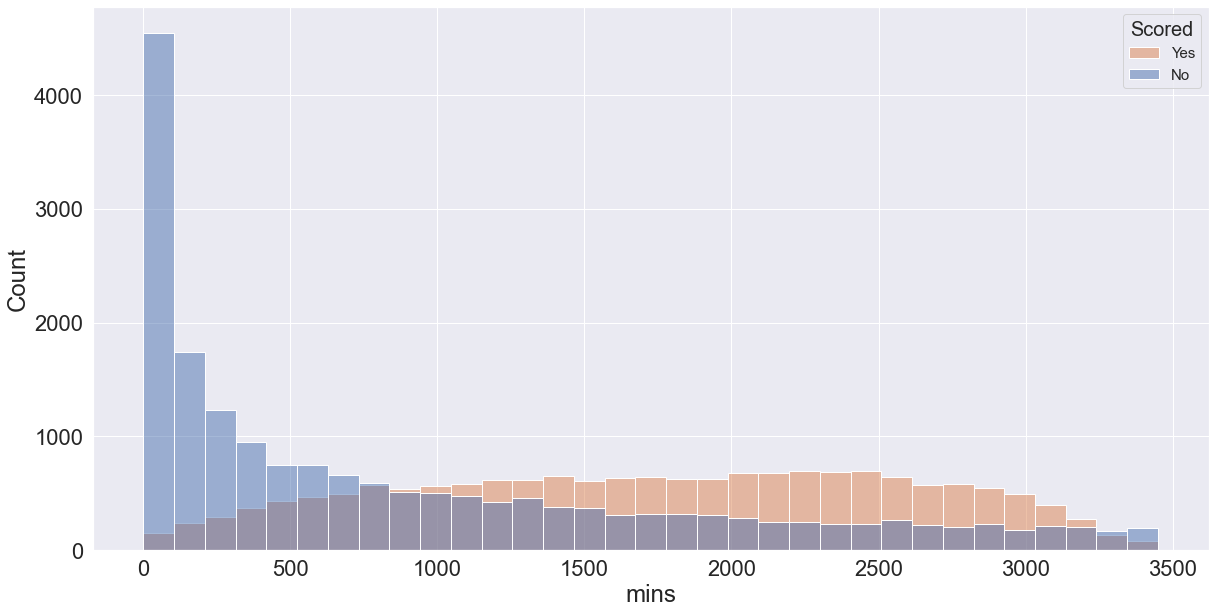

In [21]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.histplot(df,x='mins',hue='goals_cat')
plt.legend(title='Scored', loc='upper right', labels=['Yes','No'],fontsize=15,title_fontsize=20)

Here we can see that out theory can be true. The distribution of minutes is more concentrated around 0 when the player didn´t score. The ones that didn´t score but played a normal amount of minutes can be defendes or goalkeepers.



Text(0.5, 0, 'Position')

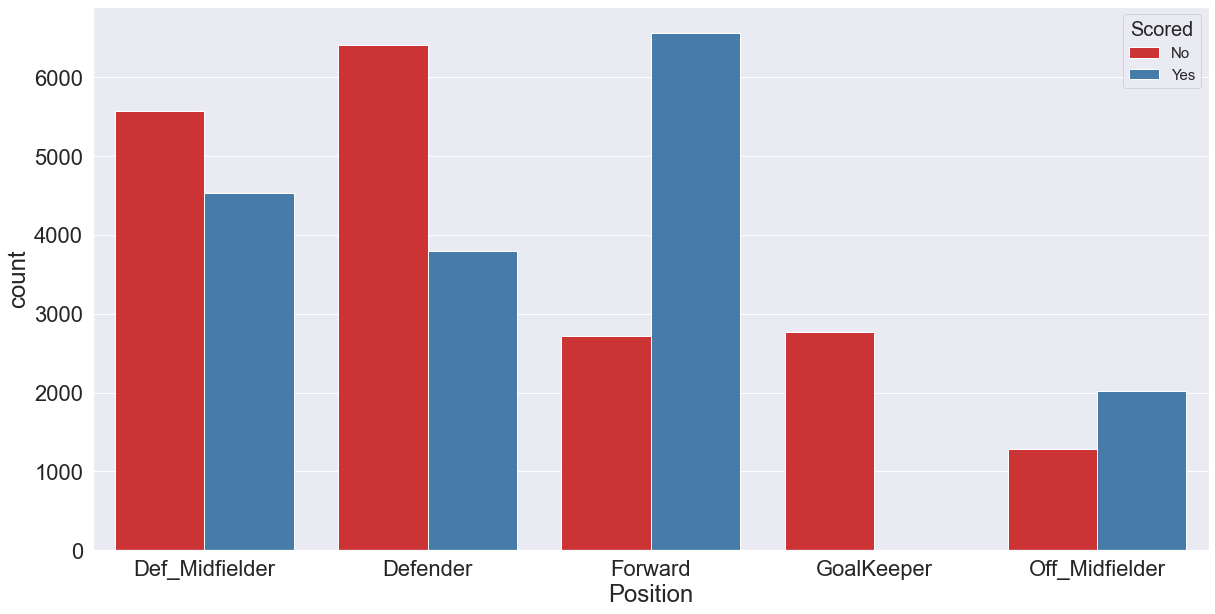

In [22]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.countplot(data=df, x="position_cat",hue='goals_cat',palette='Set1')
plt.legend(title='Scored', loc='upper right', labels=['No', 'Yes'],fontsize=15,title_fontsize=20)
plt.xlabel("Position")

We can say that a "-" means a 0. In the chart above we can see the clear differences between the positions and that goalkeepers always have a "-". Before switching all "-" in the dataframe to 0 we will evaluate the mins for each category as we did with goals. If the distribution is similar to the goals one we will make the replace.

<ipython-input-23-dc876f490110>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


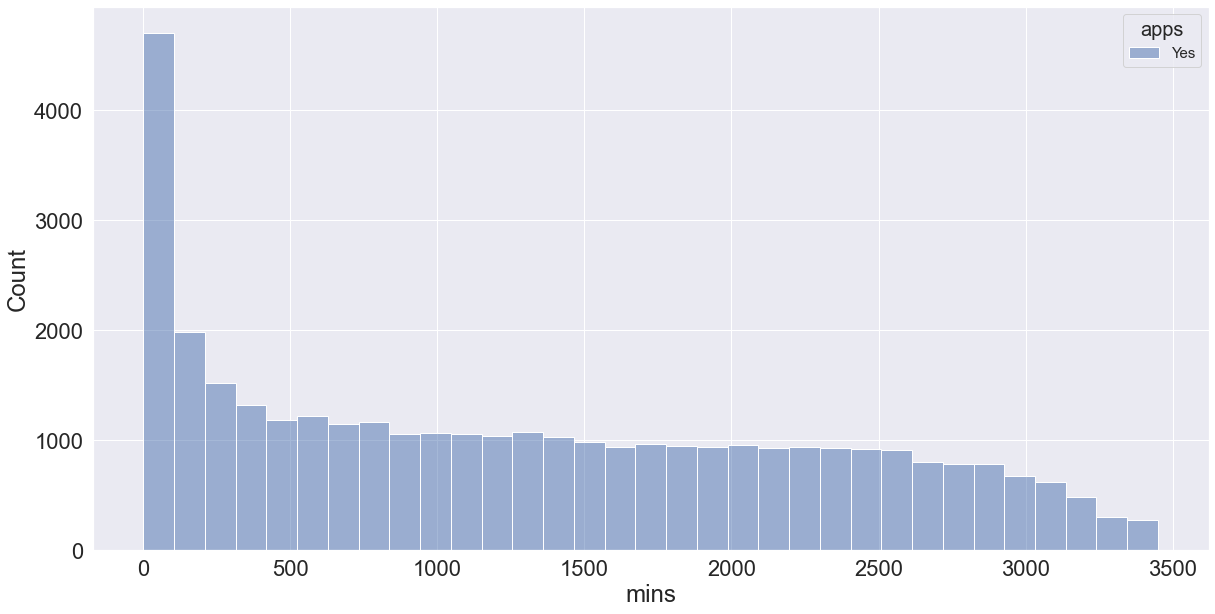

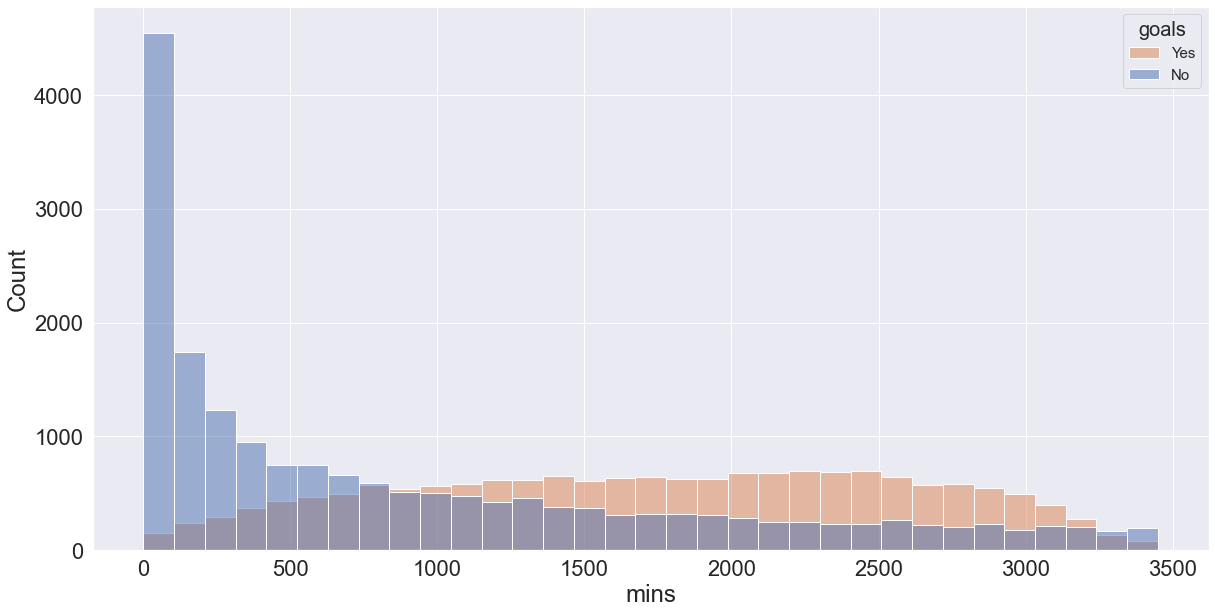

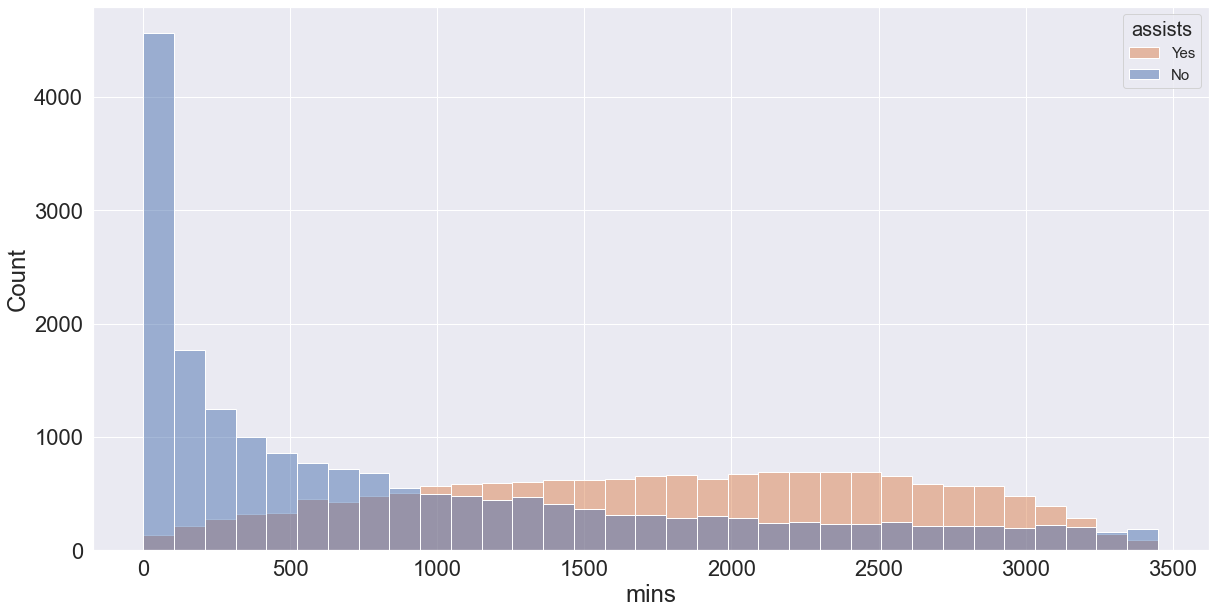

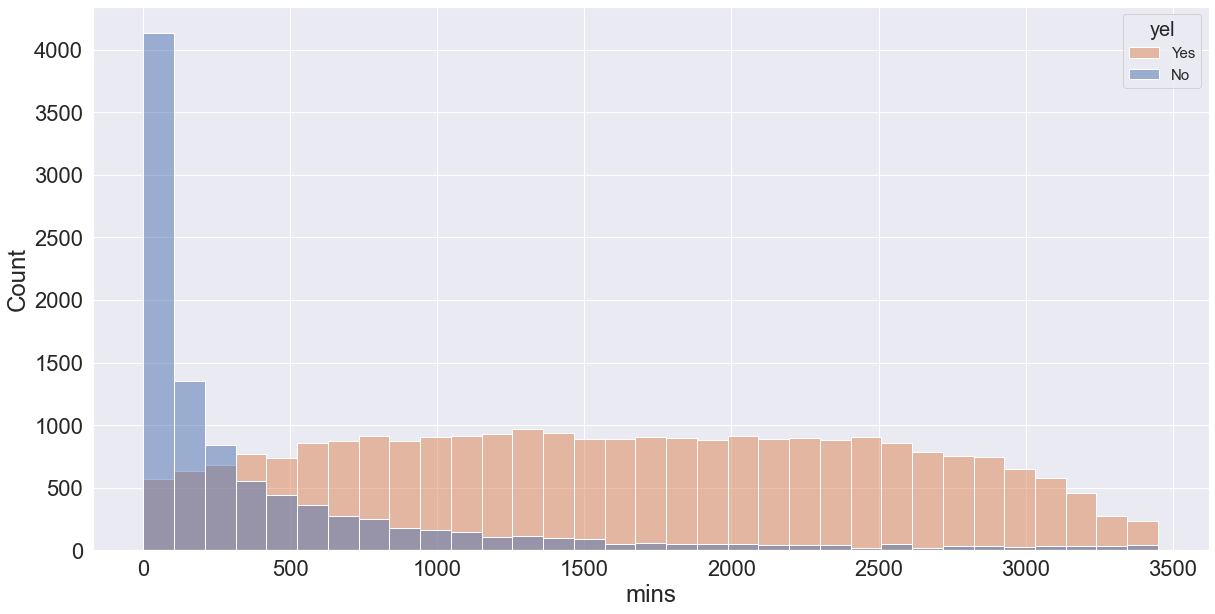

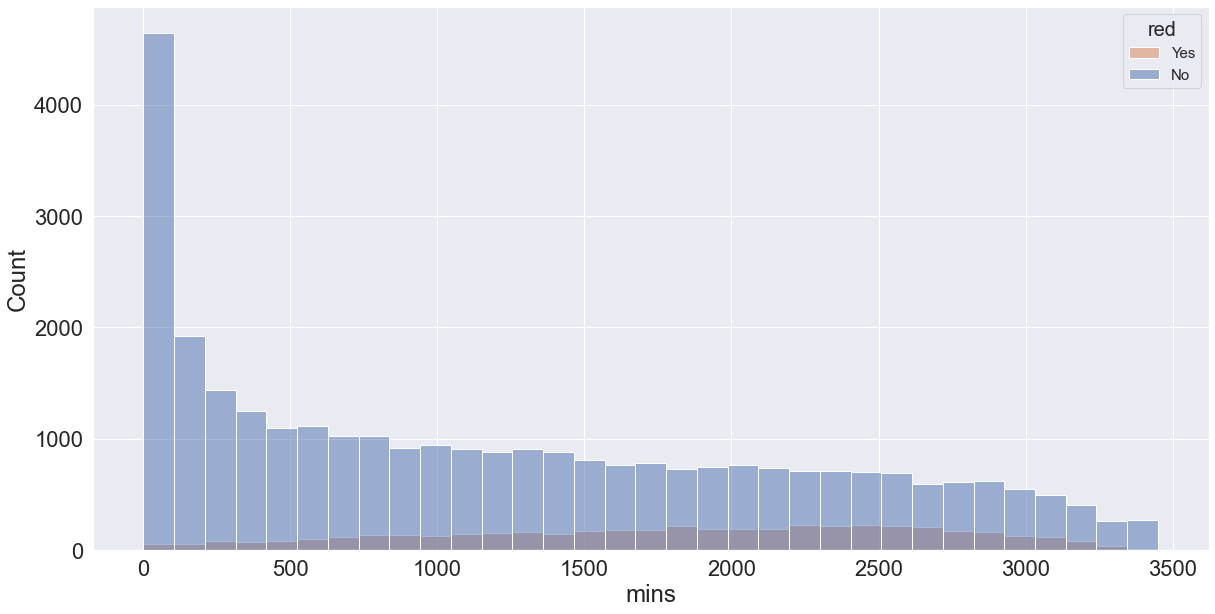

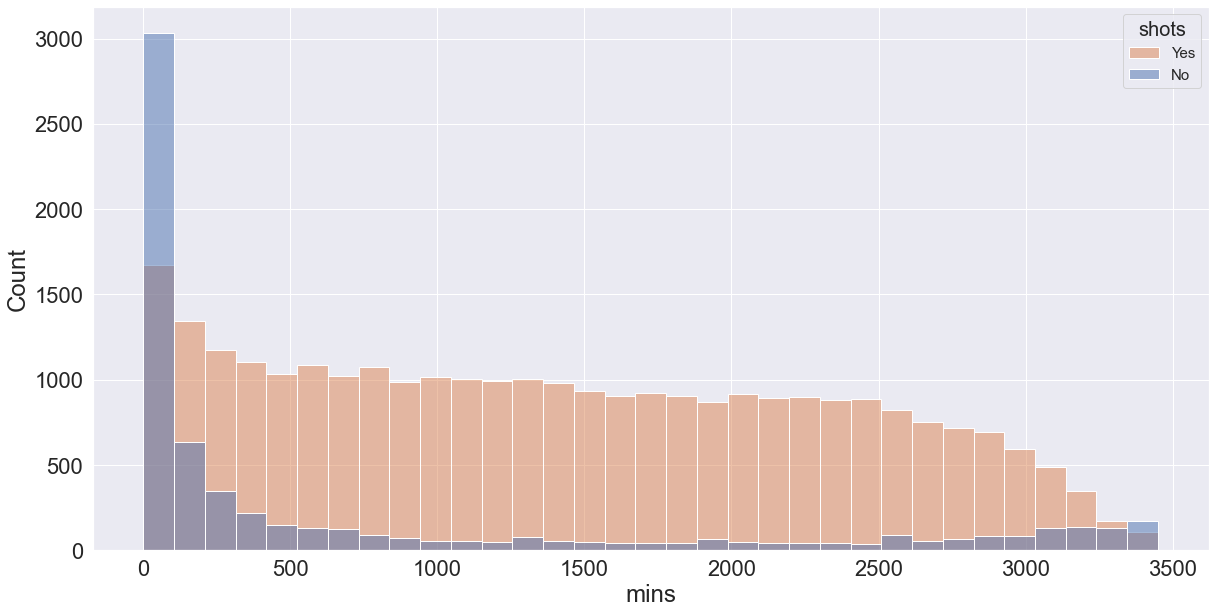

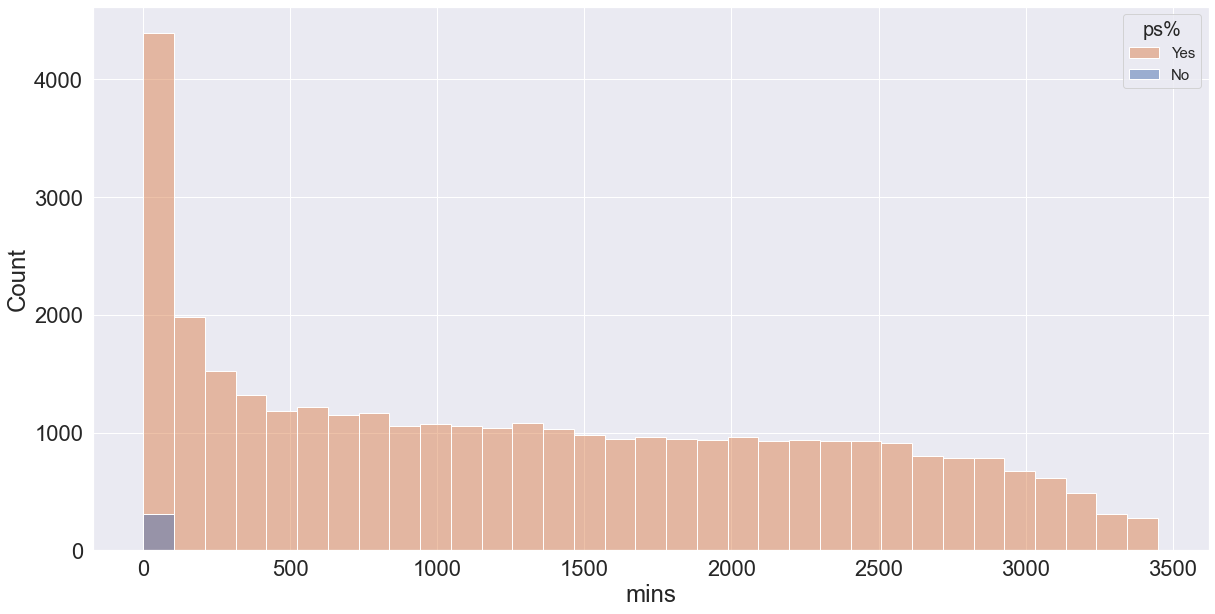

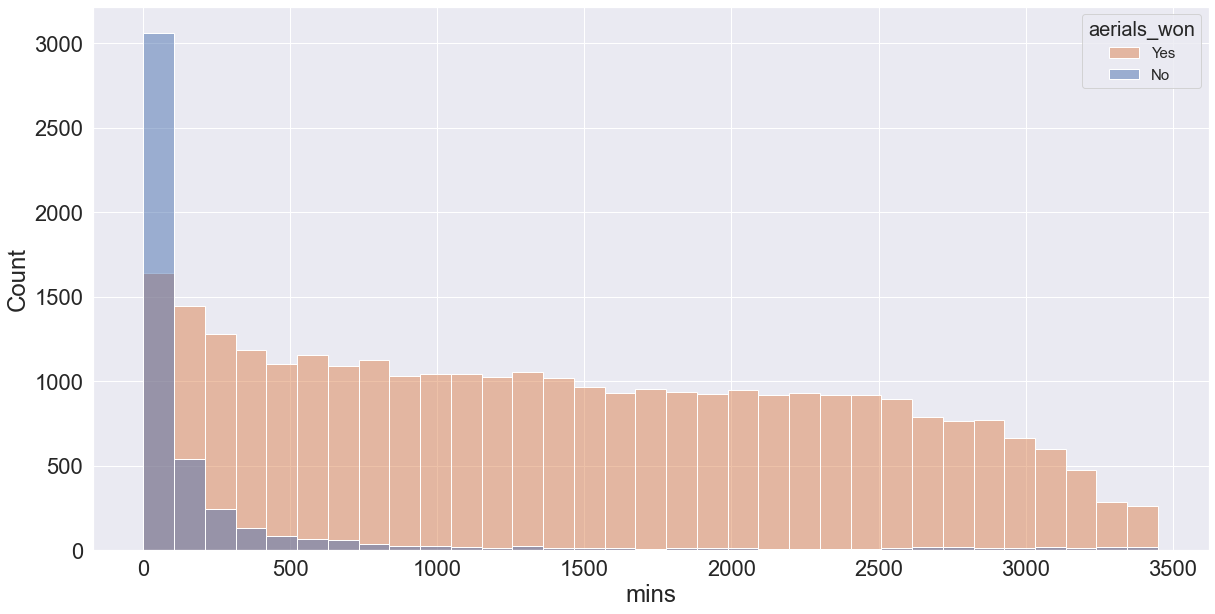

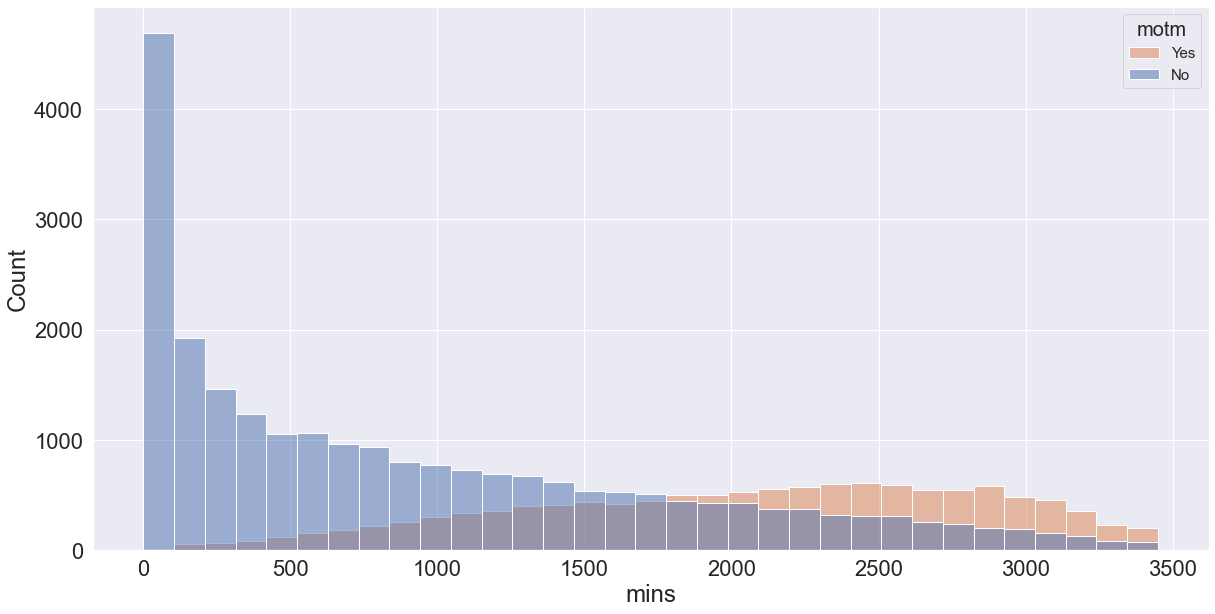

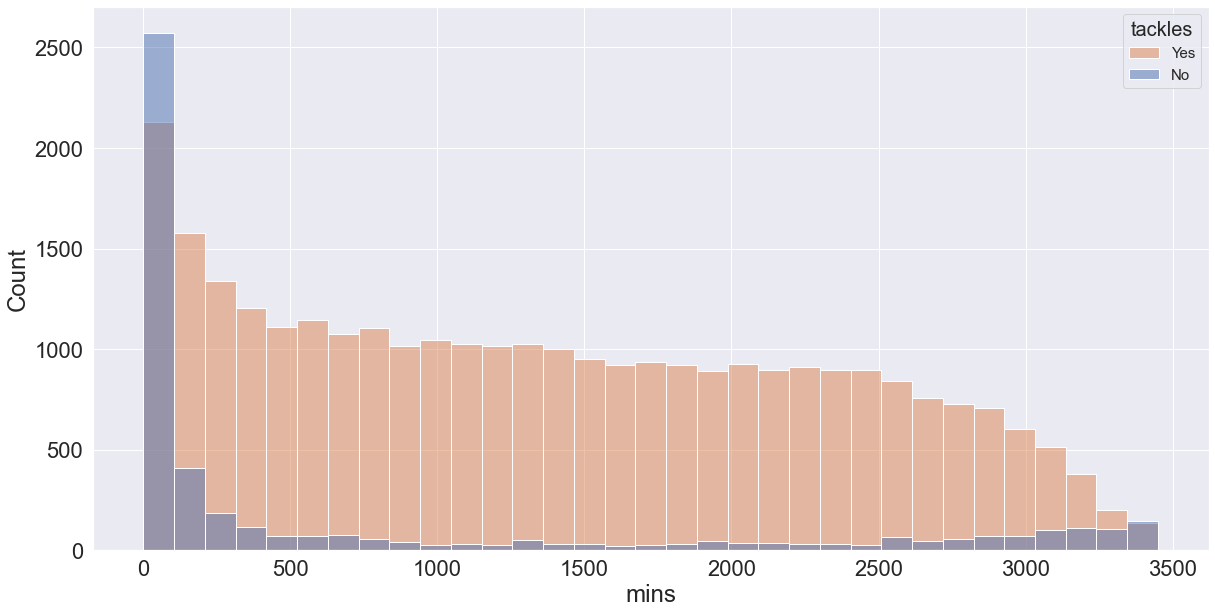

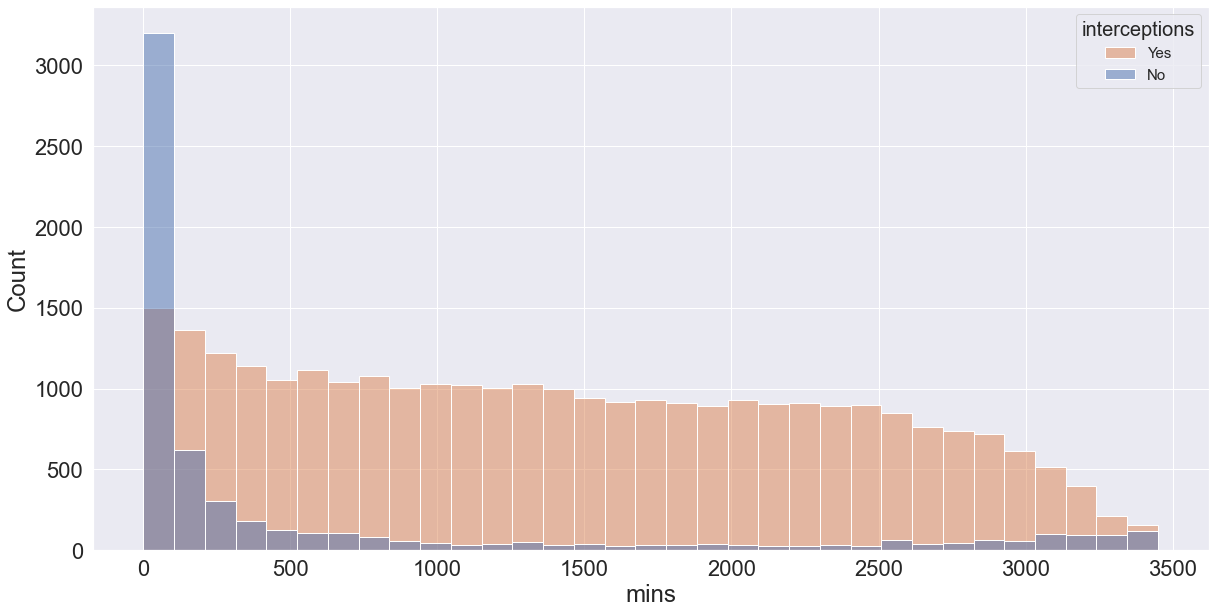

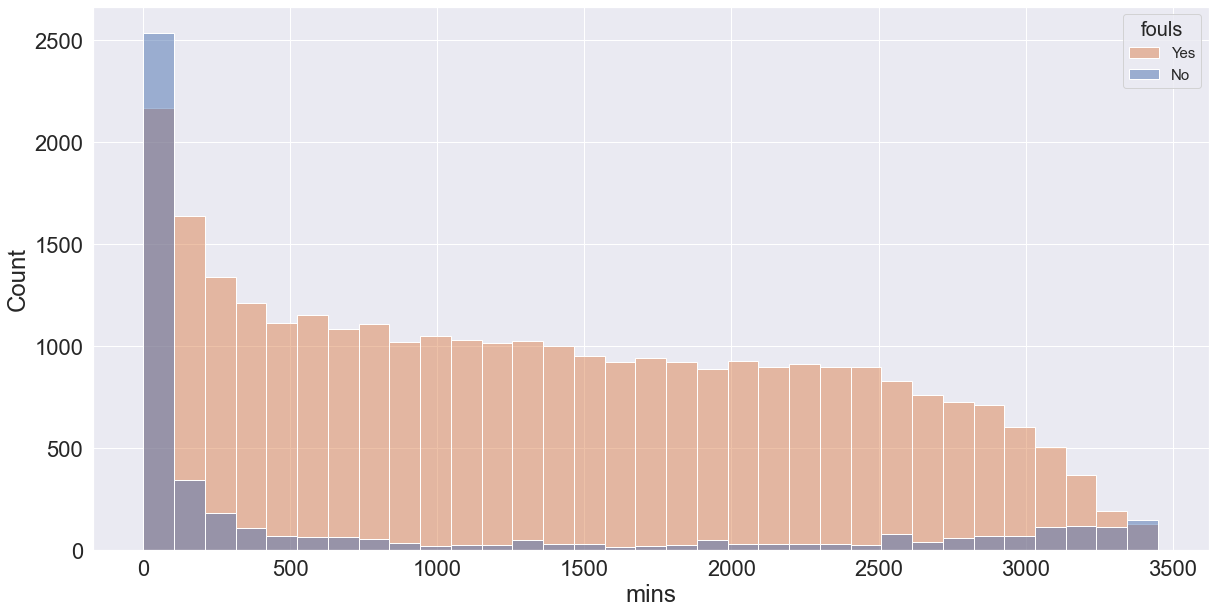

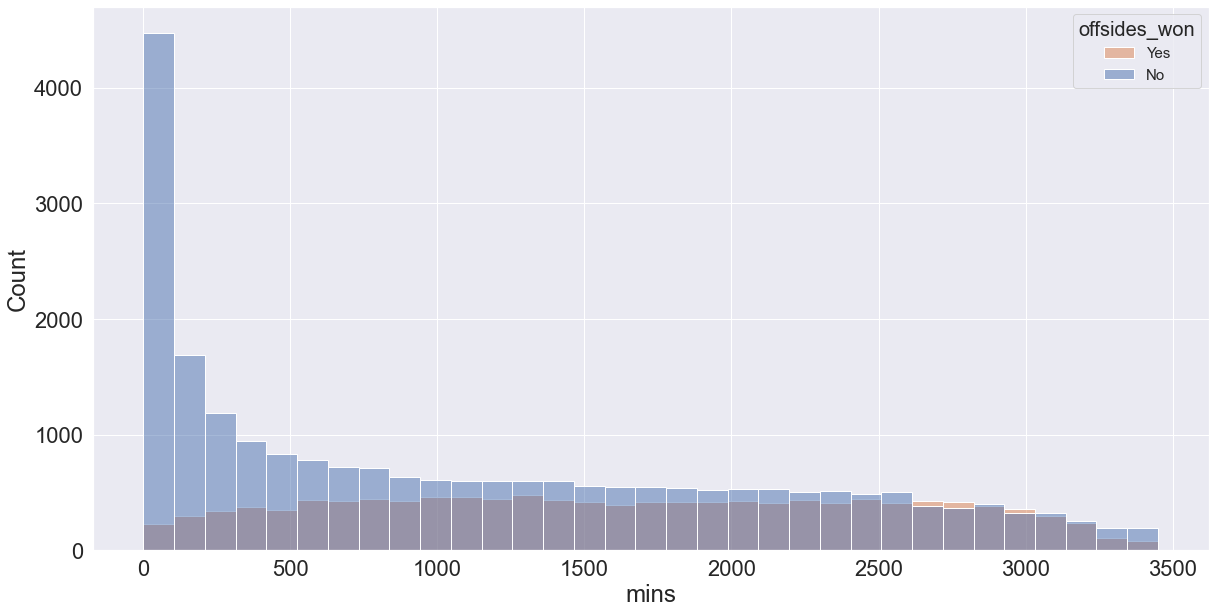

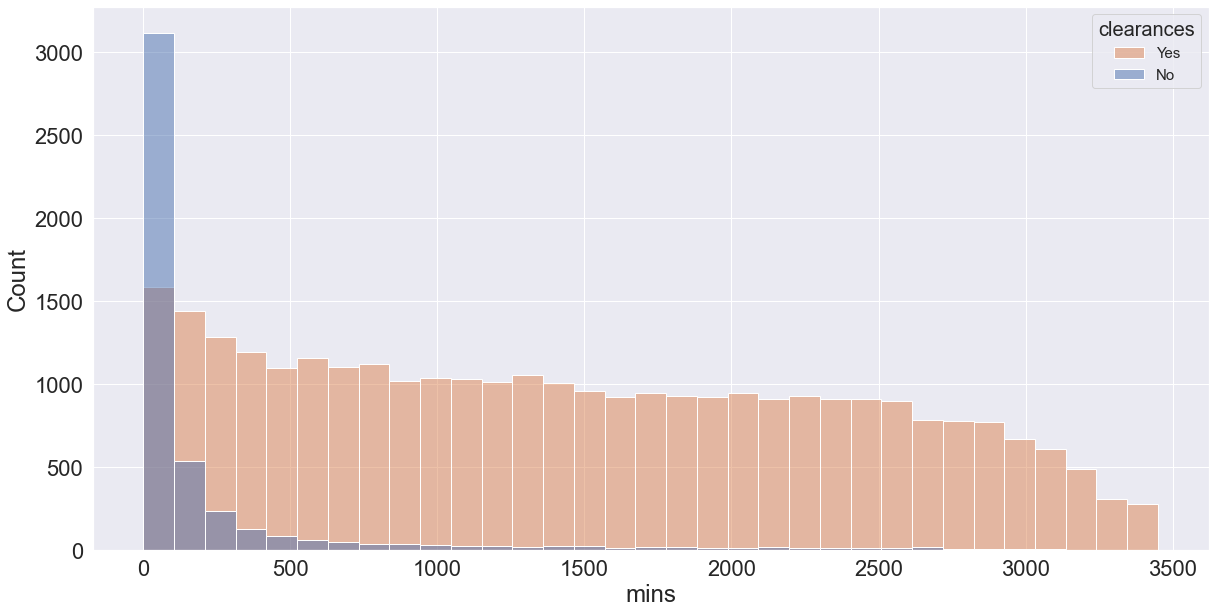

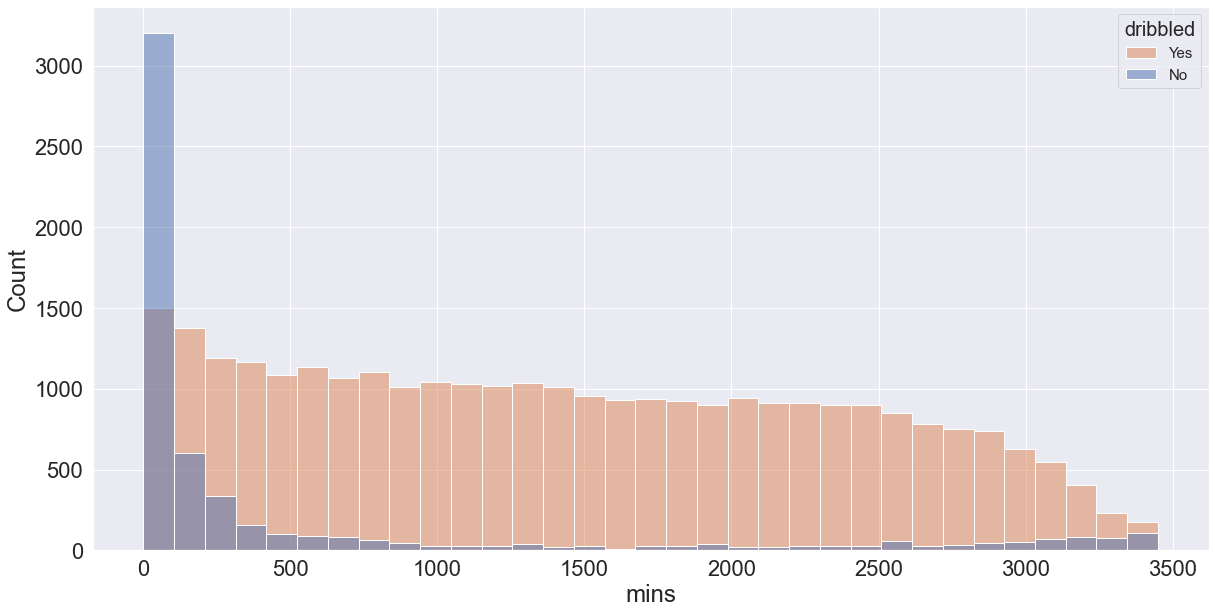

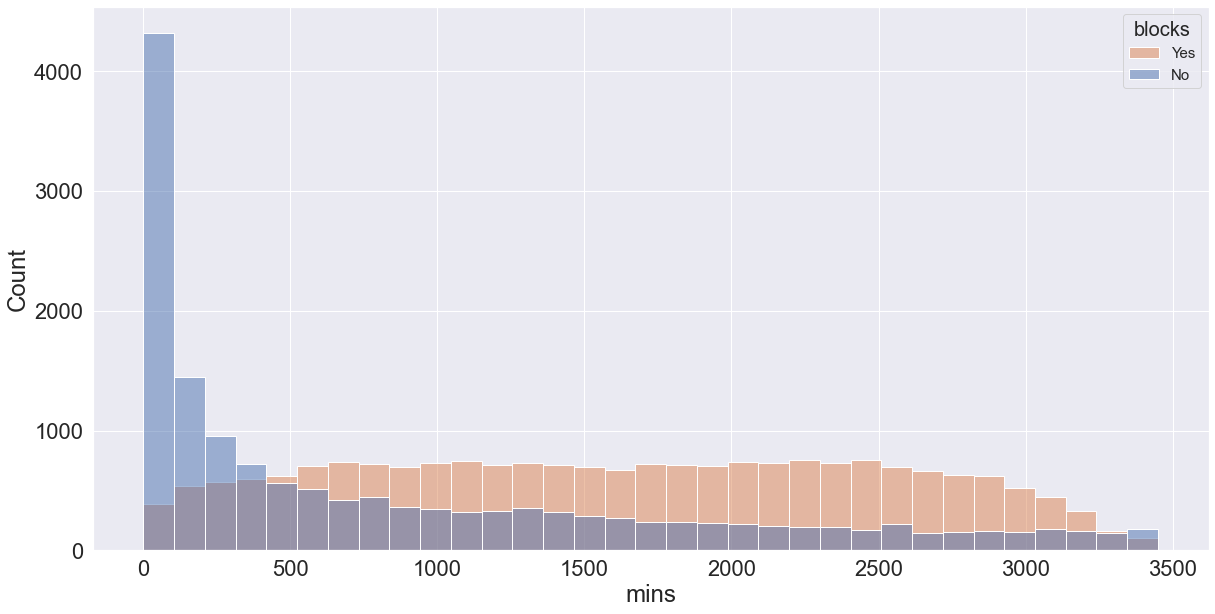

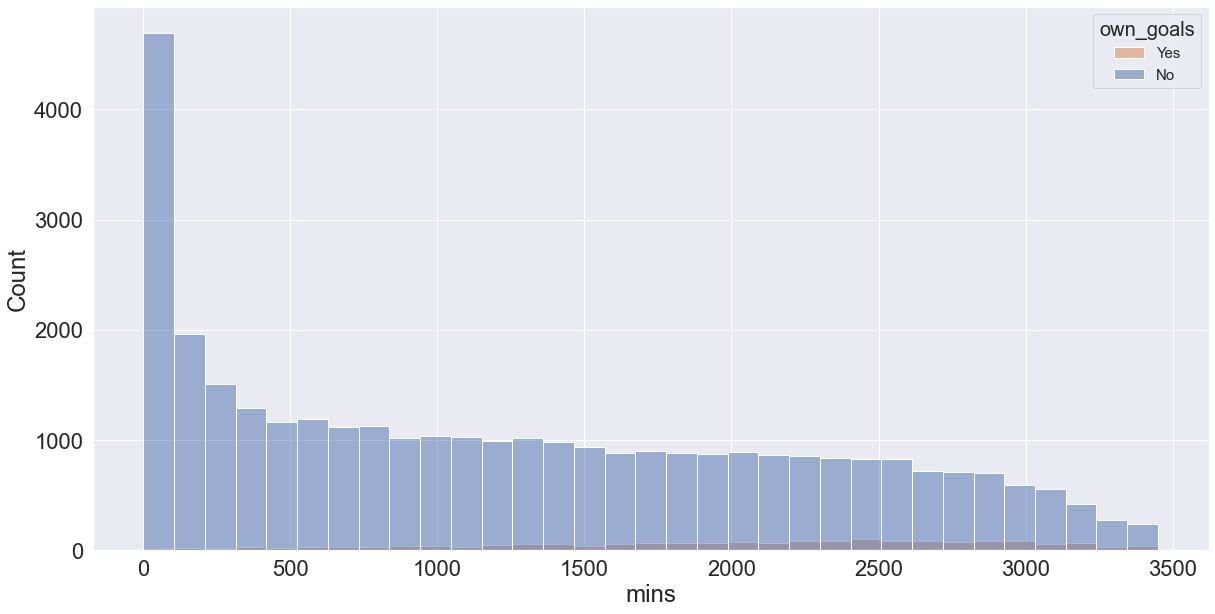

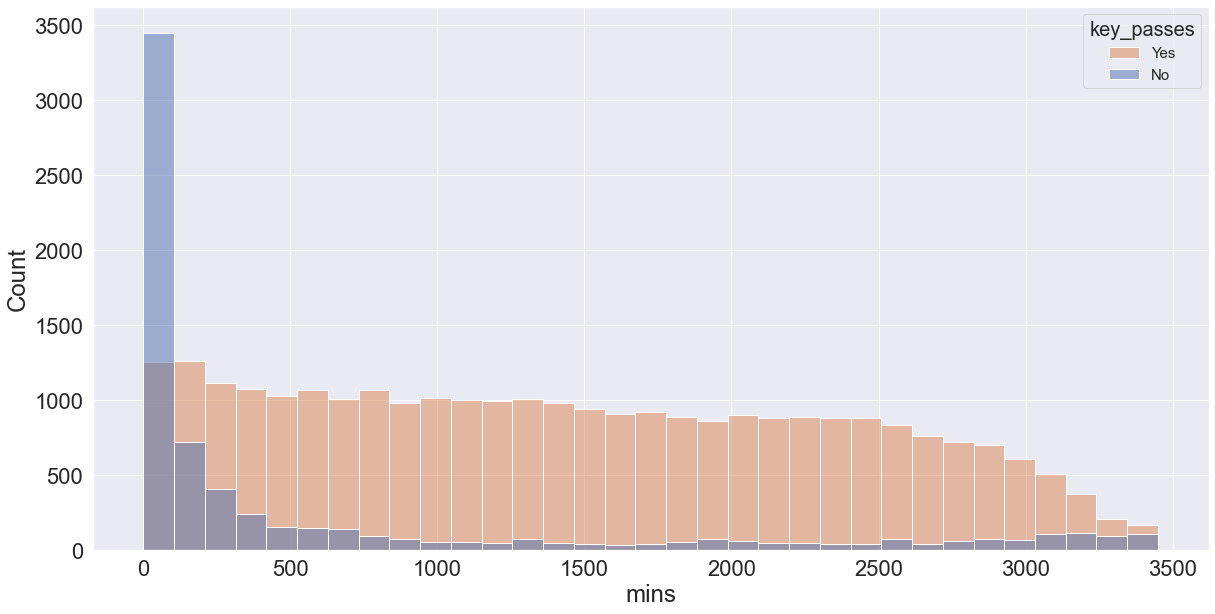

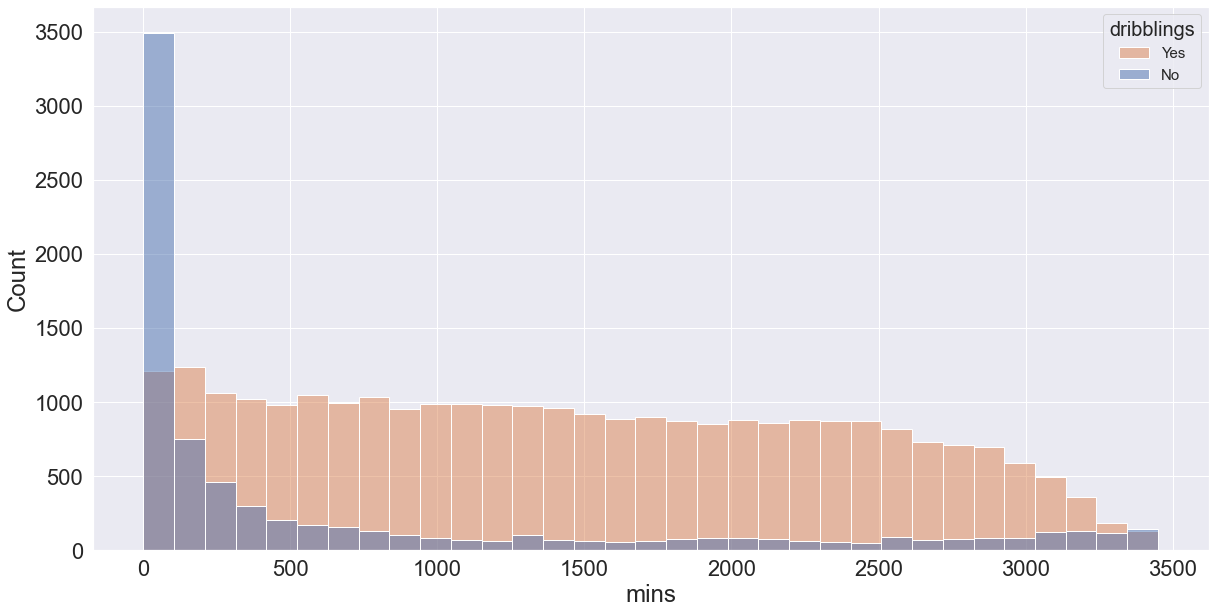

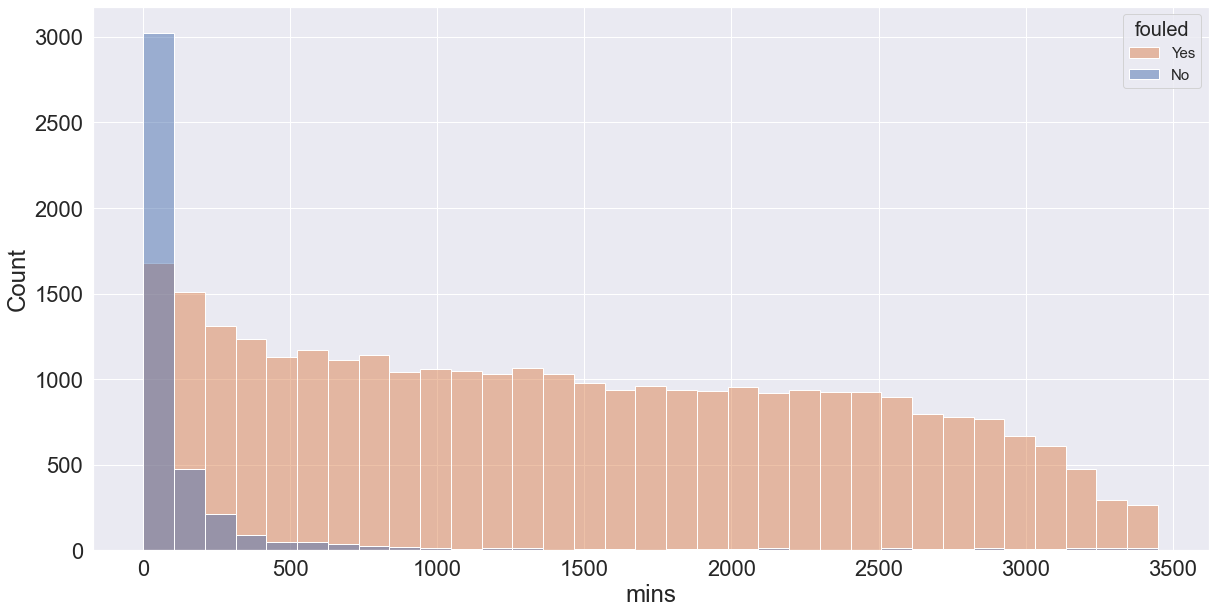

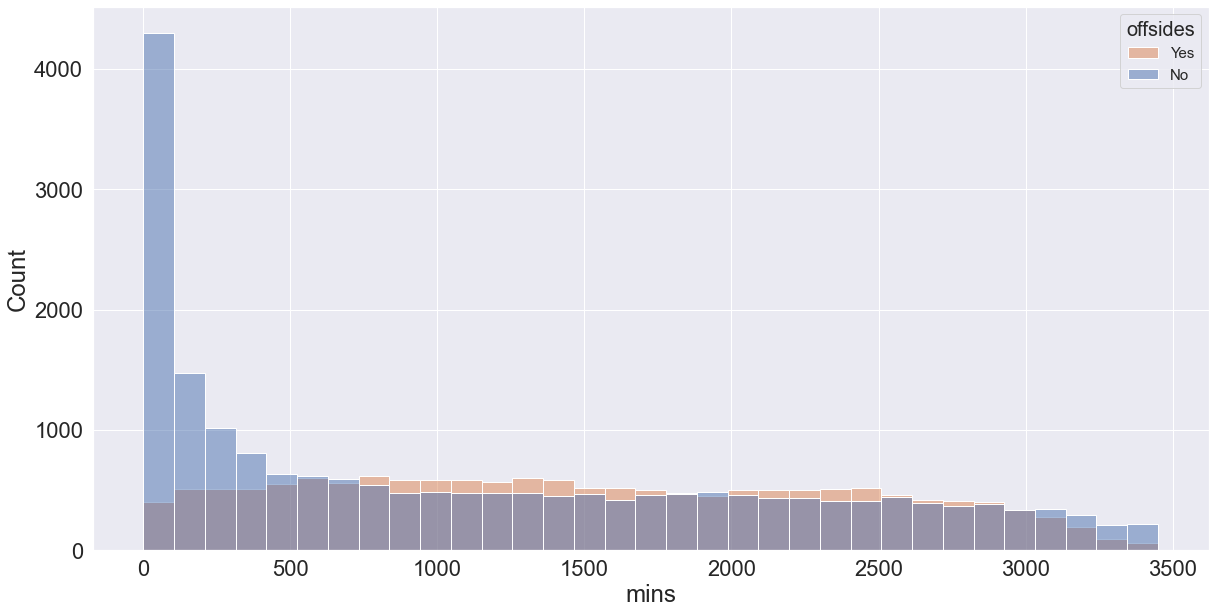

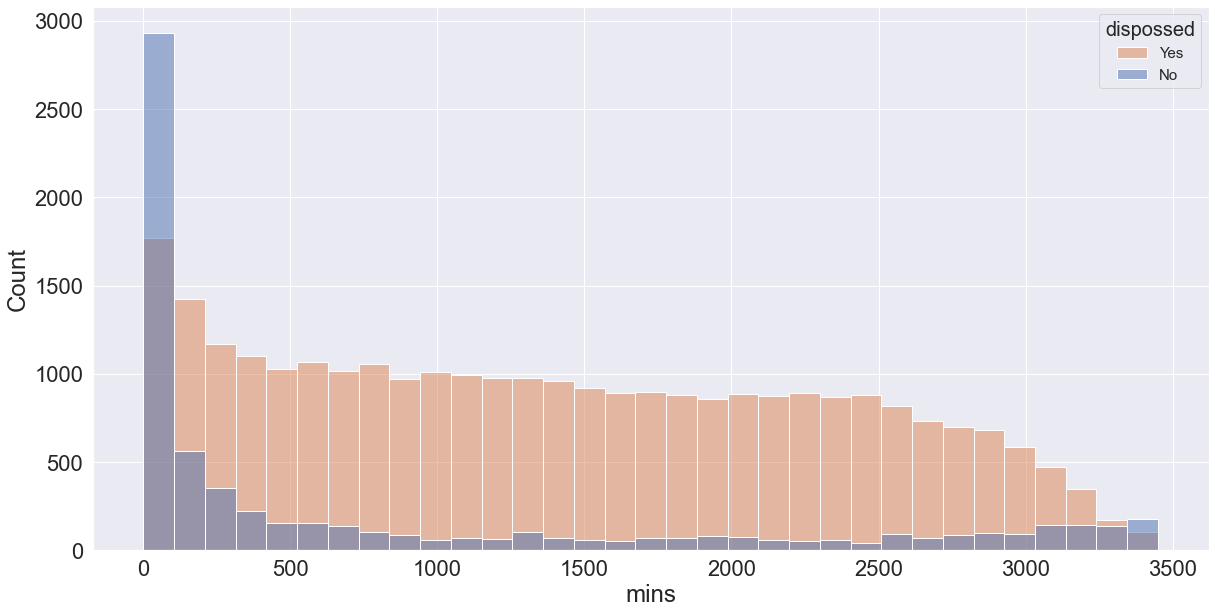

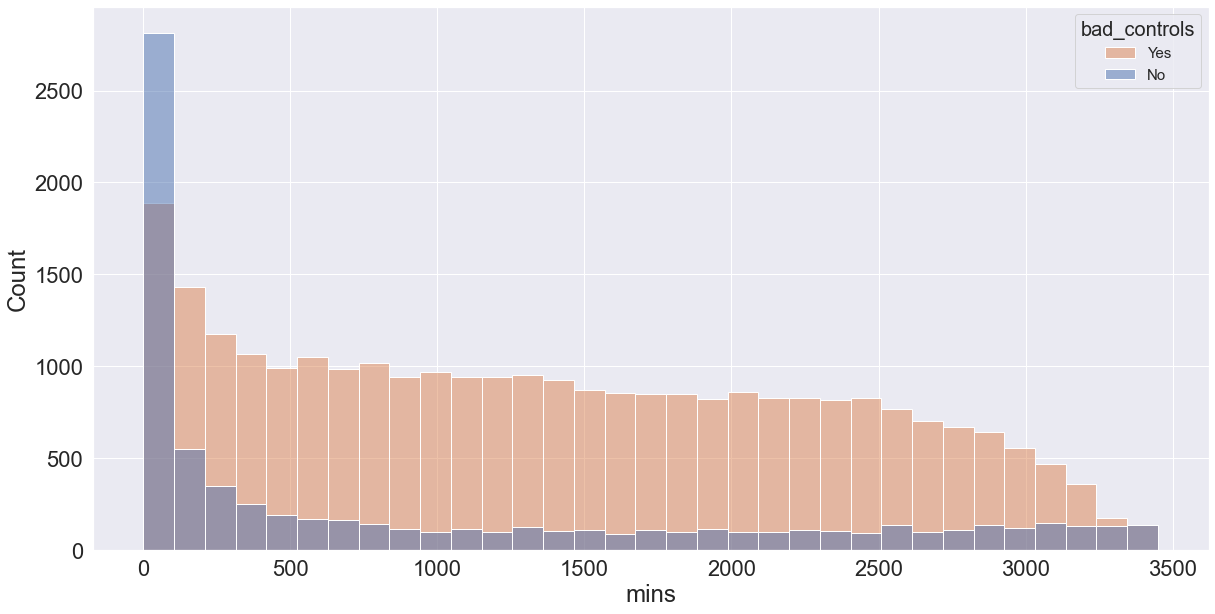

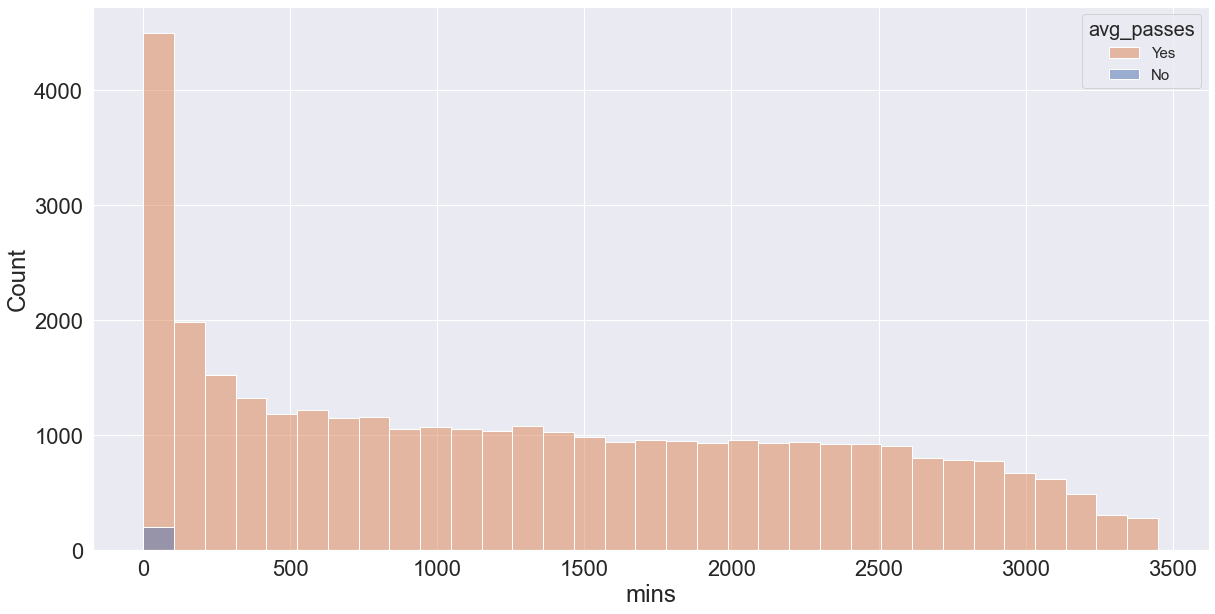

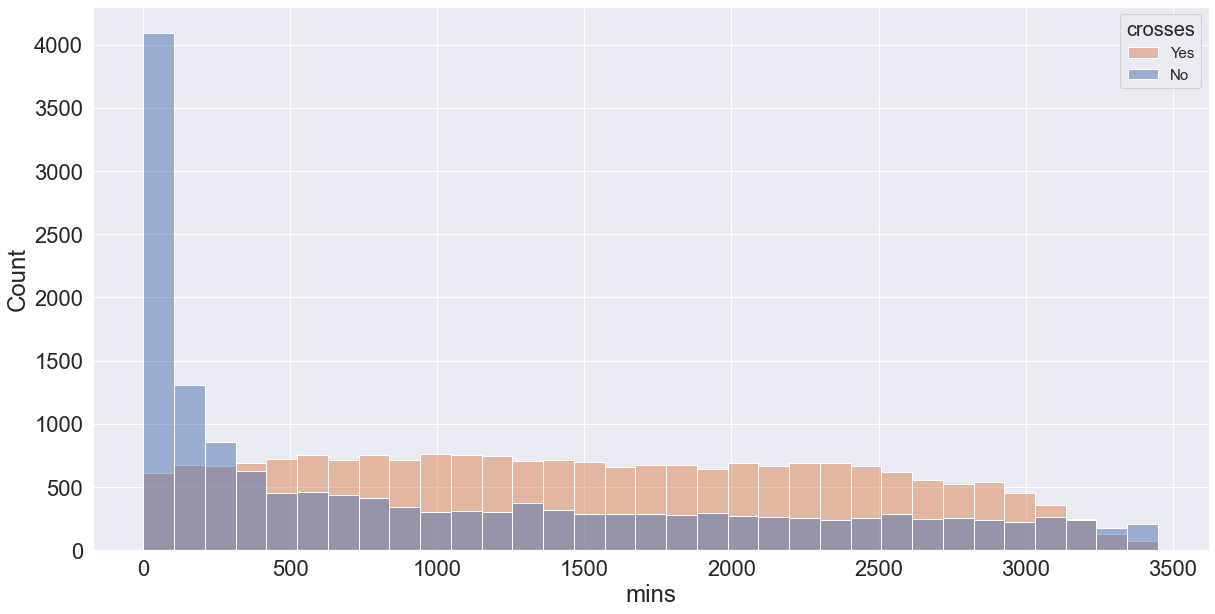

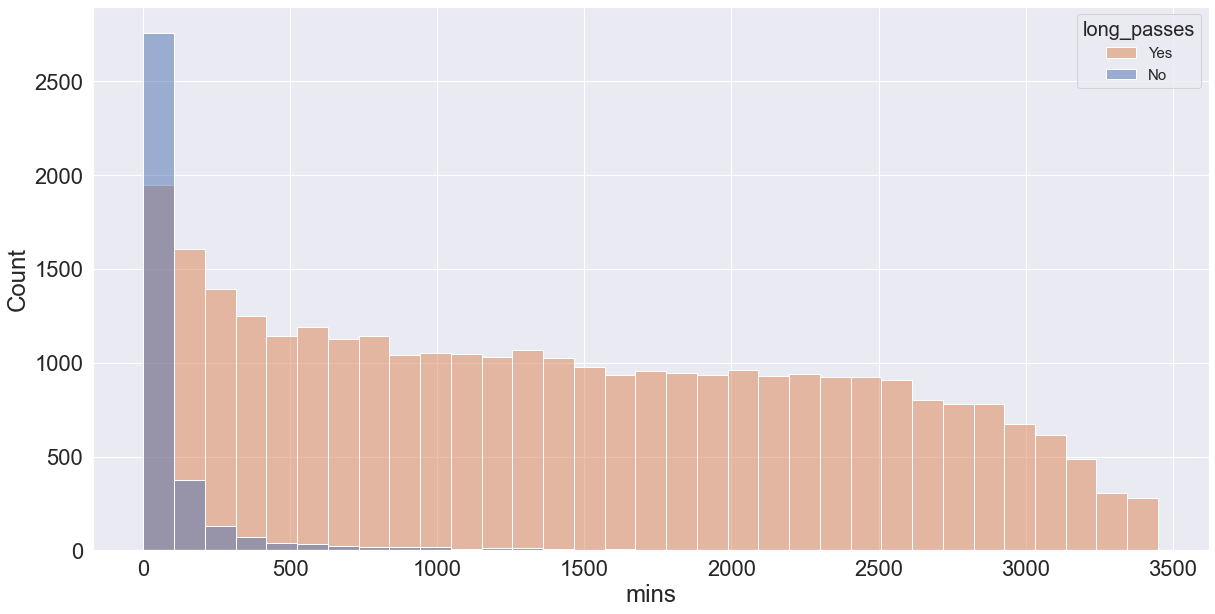

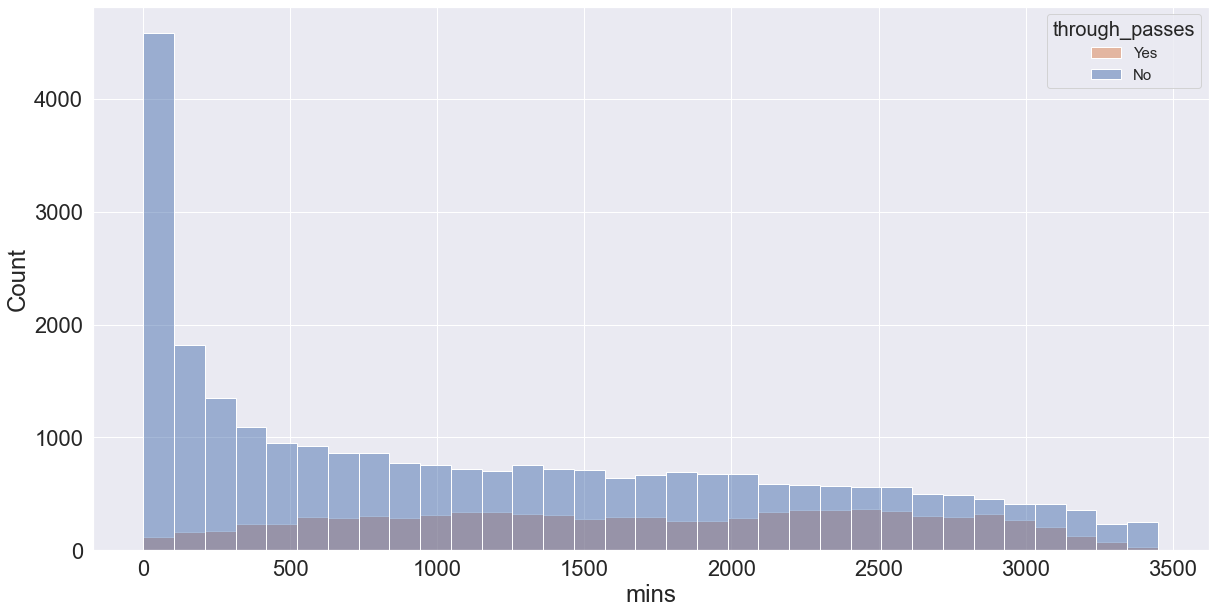

In [23]:
test = df.copy()


for x in to_float:
    test[x] = test[x].fillna(0)
    test[x] = np.where(test[x] == 0,0,1)
    plt.figure(figsize=(20,10))
    sns.set(font_scale = 2)
    sns.histplot(test,x='mins',hue=x)
    plt.legend(title=x, loc='upper right', labels=['Yes', 'No'],fontsize=15,title_fontsize=20)

As we can see almost all features follow the same distribution based on whether the have a 0 or not. The ones that don´t follow this distrbution are ones like red cards, ps that is a % etc so they are totally justified. We can confidently fill the nulls with "0" in all features except for fee. that a null means no fee.

In [24]:
# remove goals_cat 
df = df.drop('goals_cat',axis=1)

for x in to_float:
    df[x] = df[x].fillna(0)
    
df.isna().sum()

name                  0
club                  0
position              0
apps                  0
mins                  0
goals                 0
assists               0
yel                   0
red                   0
shots                 0
ps%                   0
aerials_won           0
motm                  0
rating                0
tackles               0
interceptions         0
fouls                 0
offsides_won          0
clearances            0
dribbled              0
blocks                0
own_goals             0
key_passes            0
dribblings            0
fouled                0
offsides              0
dispossed             0
bad_controls          0
avg_passes            0
crosses               0
long_passes           0
through_passes        0
league                0
season                0
fee               29802
traded                0
position_cat          0
dtype: int64

The goal of this project is to predict the churn in football players based on their stats so the feature fee seems useless for this pourpouse.

In [25]:
df = df.drop('fee',axis = 1)

First thing I want to study is the minutes distribution of minutes in traded and non traded players. Because I am not sure if we should take players that didn´t play in consideration.

Text(0.5, 0, 'Mins')

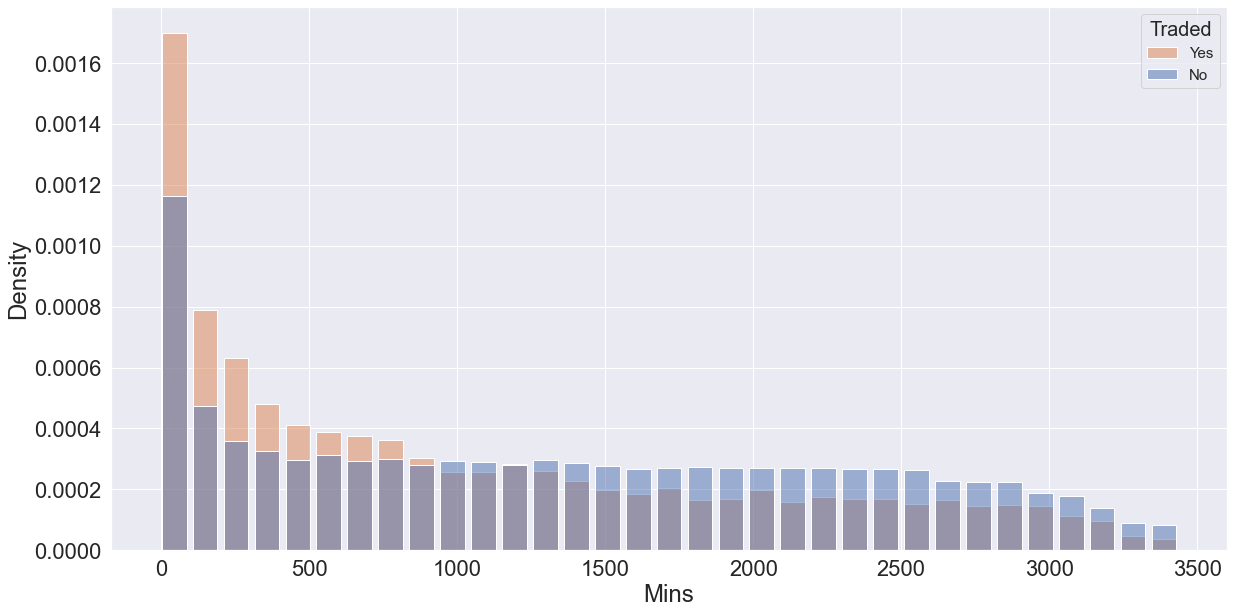

In [67]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
sns.histplot(data=df,x='mins',hue="traded",stat = 'density', shrink = 0.8, common_norm=False)
plt.legend(title='Traded', loc='upper right', labels=['Yes', 'No'],fontsize=15,title_fontsize=20)
plt.xlabel("Mins")

That is suprising for me. The most part of the players that are traded didn´t have a lot of minutes last season which implicates that most part of trades are based on a bad performance. We will keep minutes since seems important.

Correlation

<AxesSubplot:>

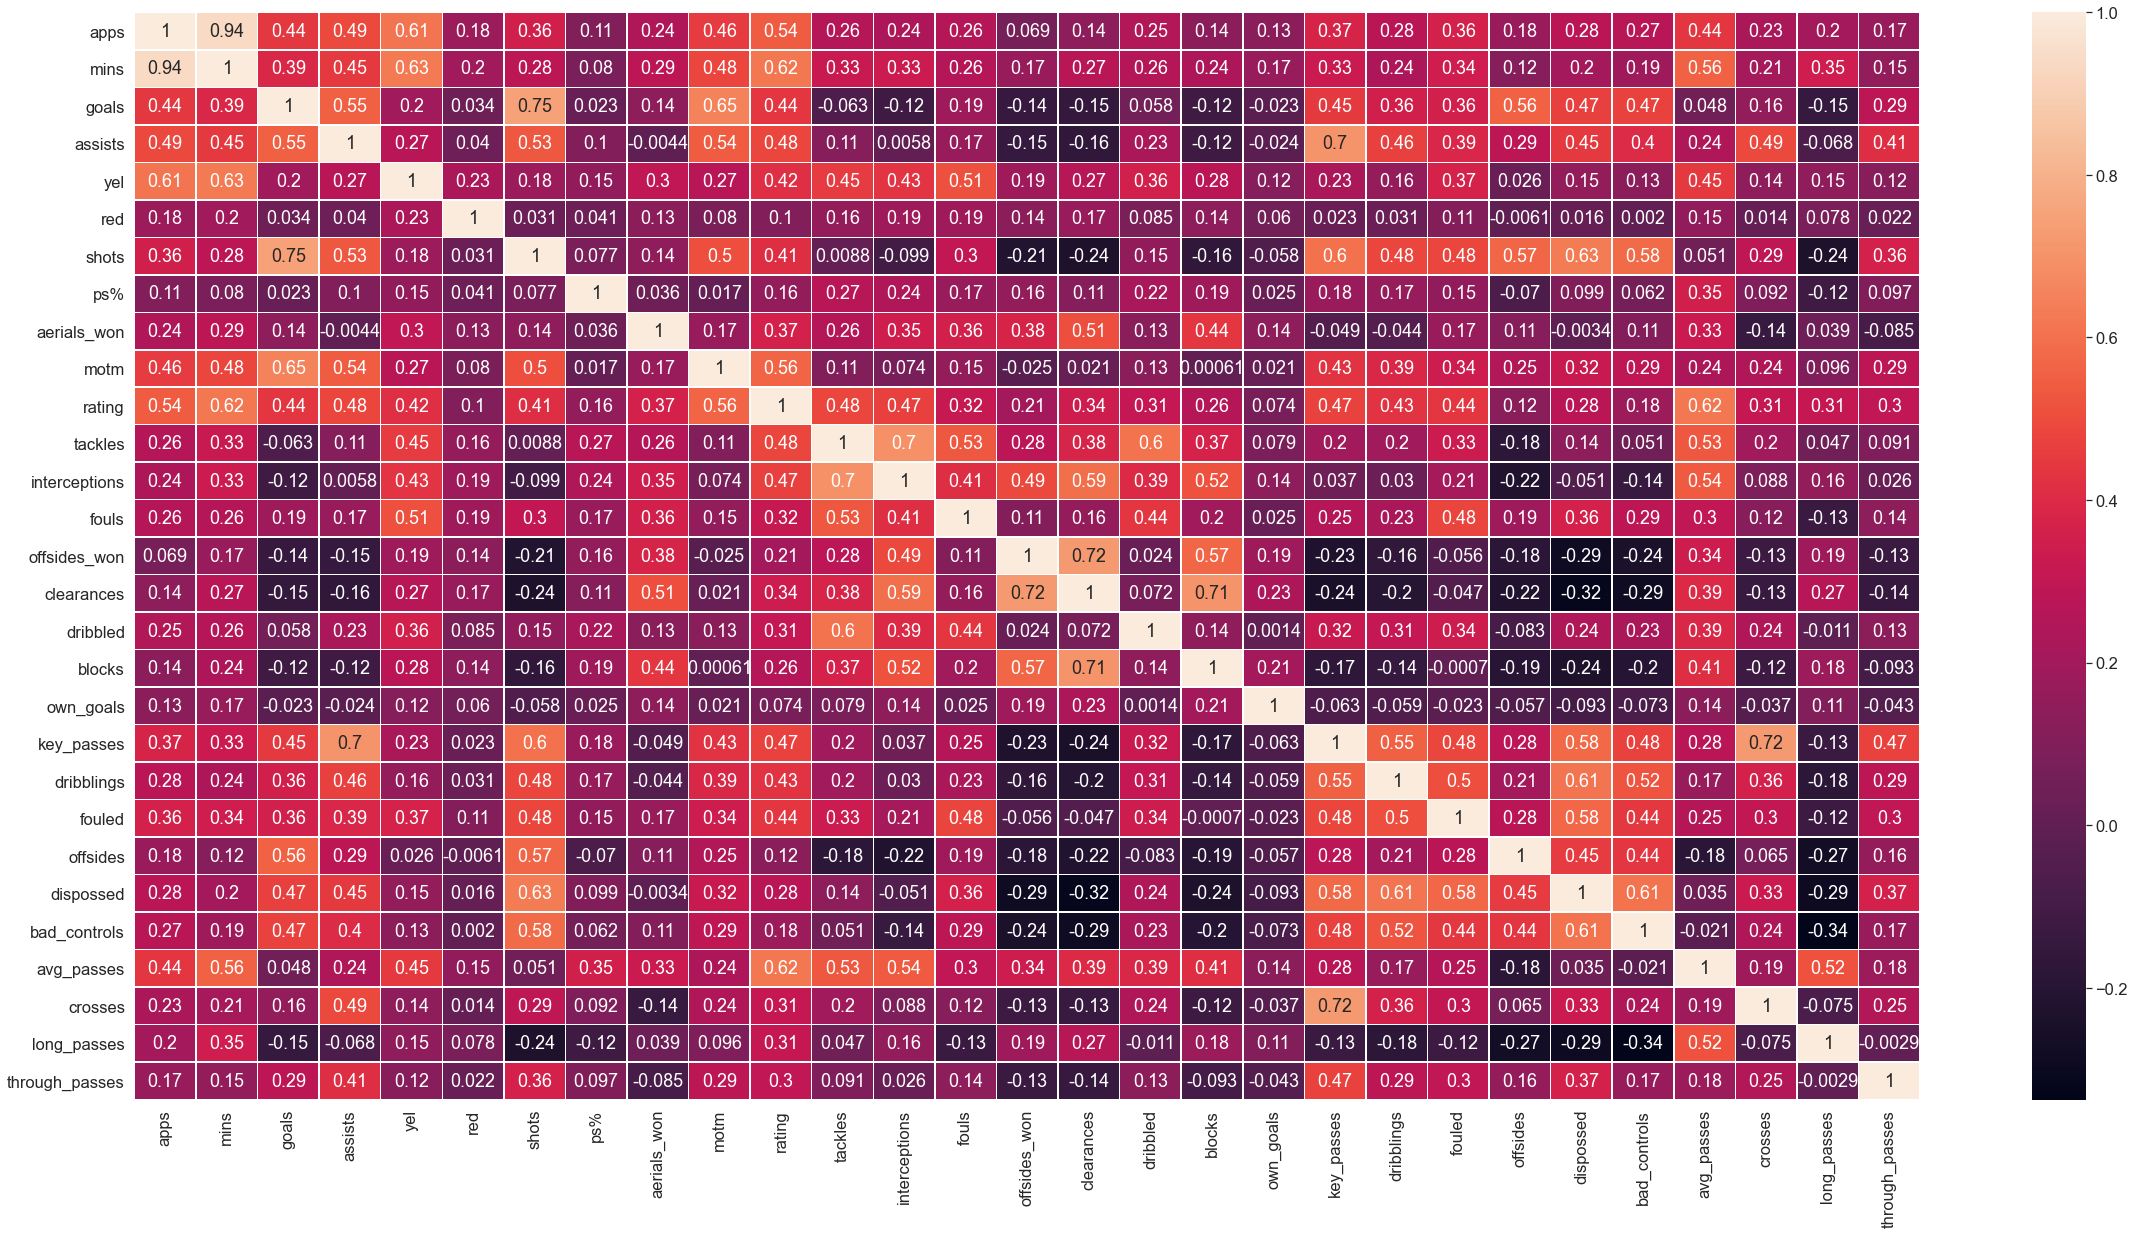

In [74]:
corr = df.corr()
plt.figure(figsize=(40,20))
sns.set(font_scale = 1.5)
sns.heatmap(corr,linewidth=.5,annot=True)

In [108]:
df.corr().columns

Index(['apps', 'mins', 'goals', 'assists', 'yel', 'red', 'shots', 'ps%',
       'aerials_won', 'motm', 'rating', 'tackles', 'interceptions', 'fouls',
       'offsides_won', 'clearances', 'dribbled', 'blocks', 'own_goals',
       'key_passes', 'dribblings', 'fouled', 'offsides', 'dispossed',
       'bad_controls', 'avg_passes', 'crosses', 'long_passes',
       'through_passes'],
      dtype='object')

In [116]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df.corr())
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
table = get_top_abs_correlations(df, 30).to_frame()
cm = sns.light_palette("green", as_cmap=True)
tb = table.style.background_gradient(cmap=cm)
tb

Top Absolute Correlations


,,0
apps,mins,0.942176
goals,shots,0.745928
key_passes,crosses,0.722864
offsides_won,clearances,0.719157
clearances,blocks,0.706530
assists,key_passes,0.702588
tackles,interceptions,0.695524
goals,motm,0.652546
shots,dispossed,0.630500
mins,yel,0.628125


Nota para mi:

    1.- Hay mucha correlación entre variables, quizas sea bueno hacer pca https://www.baeldung.com/cs/correlation-classification-algorithms
    
    2.- Se puede usar traded para la correlacion ?